In [765]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from scipy import stats
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('dataset.csv')

In [767]:
df.head()

,property_url,property_id,address,street_name,apartment,city,state,latitude,longitude,postcode,...,property_type,property_status,year_build,total_num_units,listing_age,RunDate,agency_name,agent_name,agent_phone,is_owned_by_zillow
0,https://www.zillow.com/homedetails/3-Plat-83-1...,2064212272,"3 Plat #83-10, Wrangell, AK 99929",Plat #83-10,NaN,Wrangell,AK,NaN,NaN,99929,...,LOT,FOR_SALE,NaN,NaN,-1,24-04-2022 07:34,Anchor Properties,NaN,NaN,0
1,https://www.zillow.com/homedetails/117-3rd-St-...,249518113,"117 3rd St, Wrangell, AK 99929",3rd St,NaN,Wrangell,AK,56.474518,-132.38600,99929,...,SINGLE_FAMILY,FOR_SALE,NaN,NaN,-1,24-04-2022 07:34,NaN,NaN,NaN,0
2,https://www.zillow.com/homedetails/LOT-2A-Fron...,2077729913,"LOT 2A Front St, Wrangell, AK 99929",LOT 2A Front St,NaN,Wrangell,AK,56.471638,-132.38686,99929,...,LOT,FOR_SALE,NaN,NaN,-1,24-04-2022 07:34,NaN,NaN,NaN,0
3,https://www.zillow.com/homedetails/LOT-A-Plat-...,2067488502,"LOT A Plat #2009-6, Wrangell, AK 99929",LOT A Plat #2009-6,NaN,Wrangell,AK,NaN,NaN,99929,...,SINGLE_FAMILY,FOR_SALE,NaN,NaN,-1,24-04-2022 07:34,"Petersburg Properties, LLC",NaN,NaN,0
4,https://www.zillow.com/homedetails/335-Cassiar...,249518139,"335 Cassiar St, Wrangell, AK 99929",Cassiar St,NaN,Wrangell,AK,56.475697,-132.38905,99929,...,SINGLE_FAMILY,FOR_SALE,NaN,NaN,-1,24-04-2022 07:34,NaN,NaN,NaN,0


In [768]:
df.shape

(50000, 28)

In [769]:
df.columns

Index(['property_url', 'property_id', 'address', 'street_name', 'apartment',
       'city', 'state', 'latitude', 'longitude', 'postcode', 'price',
       'bedroom_number', 'bathroom_number', 'price_per_unit', 'living_space',
       'land_space', 'land_space_unit', 'broker_id', 'property_type',
       'property_status', 'year_build', 'total_num_units', 'listing_age',
       'RunDate', 'agency_name', 'agent_name', 'agent_phone',
       'is_owned_by_zillow'],
      dtype='object')

In [770]:
# dropping some unwanted columns (with 90+ null values)
df.drop(['property_url', 'apartment','broker_id','year_build','total_num_units','agent_name','agent_phone'], axis=1, inplace=True)

In [771]:
# Dropping the columns which are affecting the target variable(price)
df.drop(['address','agency_name','is_owned_by_zillow', 'listing_age', "RunDate"], axis=1, inplace=True)

In [772]:
df.head()

,property_id,street_name,city,state,latitude,longitude,postcode,price,bedroom_number,bathroom_number,price_per_unit,living_space,land_space,land_space_unit,property_type,property_status
0,2064212272,Plat #83-10,Wrangell,AK,NaN,NaN,99929,135000,NaN,NaN,NaN,NaN,3.8860,acres,LOT,FOR_SALE
1,249518113,3rd St,Wrangell,AK,56.474518,-132.38600,99929,589500,3.0,3.0,237.0,2478.0,7492.0000,sqft,SINGLE_FAMILY,FOR_SALE
2,2077729913,LOT 2A Front St,Wrangell,AK,56.471638,-132.38686,99929,99999,NaN,0.0,NaN,NaN,7222.0000,sqft,LOT,FOR_SALE
3,2067488502,LOT A Plat #2009-6,Wrangell,AK,NaN,NaN,99929,495000,3.0,1.0,330.0,1500.0,61.9705,acres,SINGLE_FAMILY,FOR_SALE
4,249518139,Cassiar St,Wrangell,AK,56.475697,-132.38905,99929,405000,5.0,3.0,194.0,2080.0,10436.0000,sqft,SINGLE_FAMILY,FOR_SALE


In [773]:
df.isna().sum()

property_id            0
street_name            3
city                   0
state                  0
latitude            5563
longitude           5563
postcode               2
price                  0
bedroom_number     11566
bathroom_number    11420
price_per_unit     11786
living_space        7565
land_space          6164
land_space_unit     6164
property_type          0
property_status        0
dtype: int64

In [774]:
df = df[df['postcode'].astype(str).str.isnumeric()]

In [775]:
df['postcode'] = df['postcode'].astype(int)

## CAT - null

In [776]:
# ALWAYS REMEMBER TO SPLIT THE DATASET INTO TRAIN AND TEST BEFORE STARTING FEATUE ENGINEERIN

# Handelling Missing Values for CATAGORICAL FEATURES
# Step-1 : Make a list of features with missing values
catagorical_features_with_null = [feature for feature in df.columns if df[feature].isnull().sum() > 1 and df[feature].dtype == 'object']

# Step-2: Print the percentage of missing values for each feature
for feature in catagorical_features_with_null:
    print('{}: {}% missing values'.format(feature, np.round(df[feature].isnull().mean(), 4)))

street_name: 0.0001% missing values
land_space_unit: 0.1231% missing values


In [777]:
# Replacing catagorical-missing values with new lable
def replace_categorical_nulls(df, catagorical_features_with_null):
    data = df.copy()
    data[catagorical_features_with_null] = data[catagorical_features_with_null].fillna('Missing')
    return data

df = replace_categorical_nulls(df, catagorical_features_with_null)

df[catagorical_features_with_null].isnull().sum()

street_name        0
land_space_unit    0
dtype: int64

### Num - Nulls

In [778]:
# ALWAYS REMEMBER TO SPLIT THE DATASET INTO TRAIN AND TEST BEFORE STARTING FEATUE ENGINEERIN

# Handelling Missing Values for NUMERICAL FEATURES
# Step-1 : Make a list of features with missing values
numerical_features_with_null = [feature for feature in df.columns if df[feature].isnull().sum() > 1 and df[feature].dtype != 'object']

# Step-2: Print the percentage of missing values for each feature
for feature in numerical_features_with_null:
    print('{}: {}% missing values'.format(feature, np.round(df[feature].isnull().mean(), 4)))

latitude: 0.1113% missing values
longitude: 0.1113% missing values
bedroom_number: 0.2315% missing values
bathroom_number: 0.2286% missing values
price_per_unit: 0.2359% missing values
living_space: 0.1514% missing values
land_space: 0.1231% missing values


In [779]:
for feature in numerical_features_with_null:
    # Replace missing values with the median (good for handling outliers)
    median_value = df[feature].median()
    df[feature].fillna(median_value, inplace=True)

# Optional: Check that nulls are removed
print(df[numerical_features_with_null].isnull().sum())

latitude           0
longitude          0
bedroom_number     0
bathroom_number    0
price_per_unit     0
living_space       0
land_space         0
dtype: int64


In [780]:
df.head()

,property_id,street_name,city,state,latitude,longitude,postcode,price,bedroom_number,bathroom_number,price_per_unit,living_space,land_space,land_space_unit,property_type,property_status
0,2064212272,Plat #83-10,Wrangell,AK,47.180386,-122.43221,99929,135000,3.0,2.0,297.0,1744.0,3.8860,acres,LOT,FOR_SALE
1,249518113,3rd St,Wrangell,AK,56.474518,-132.38600,99929,589500,3.0,3.0,237.0,2478.0,7492.0000,sqft,SINGLE_FAMILY,FOR_SALE
2,2077729913,LOT 2A Front St,Wrangell,AK,56.471638,-132.38686,99929,99999,3.0,0.0,297.0,1744.0,7222.0000,sqft,LOT,FOR_SALE
3,2067488502,LOT A Plat #2009-6,Wrangell,AK,47.180386,-122.43221,99929,495000,3.0,1.0,330.0,1500.0,61.9705,acres,SINGLE_FAMILY,FOR_SALE
4,249518139,Cassiar St,Wrangell,AK,56.475697,-132.38905,99929,405000,5.0,3.0,194.0,2080.0,10436.0000,sqft,SINGLE_FAMILY,FOR_SALE


In [781]:
df.duplicated().sum()

0

In [782]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49939 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_id      49939 non-null  int64  
 1   street_name      49939 non-null  object 
 2   city             49939 non-null  object 
 3   state            49939 non-null  object 
 4   latitude         49939 non-null  float64
 5   longitude        49939 non-null  float64
 6   postcode         49939 non-null  int32  
 7   price            49939 non-null  int64  
 8   bedroom_number   49939 non-null  float64
 9   bathroom_number  49939 non-null  float64
 10  price_per_unit   49939 non-null  float64
 11  living_space     49939 non-null  float64
 12  land_space       49939 non-null  float64
 13  land_space_unit  49939 non-null  object 
 14  property_type    49939 non-null  object 
 15  property_status  49939 non-null  object 
dtypes: float64(7), int32(1), int64(2), object(6)
memory usage: 6.3+

In [783]:
df.nunique()

property_id        49939
street_name        36027
city                 903
state                  4
latitude           38468
longitude          37319
postcode             972
price               7170
bedroom_number        48
bathroom_number       47
price_per_unit      1415
living_space        4597
land_space          9785
land_space_unit        3
property_type          6
property_status        2
dtype: int64

In [784]:
df.describe()

,property_id,latitude,longitude,postcode,price,bedroom_number,bathroom_number,price_per_unit,living_space,land_space
count,4.993900e+04,49939.000000,49939.000000,49939.000000,4.993900e+04,49939.000000,49939.000000,4.993900e+04,4.993900e+04,49939.000000
mean,8.512607e+08,47.537886,-123.990005,98311.347123,6.380143e+05,3.258255,2.447616,4.345770e+02,2.206304e+03,2670.491364
std,9.630828e+08,4.265781,7.351283,817.972928,1.154803e+06,1.803441,6.312721,1.008765e+04,6.028446e+04,3520.611042
min,2.700000e+01,41.994377,-165.408250,8202.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.010000
25%,5.387476e+07,45.584592,-122.857550,97741.000000,2.795000e+05,3.000000,2.000000,2.550000e+02,1.315000e+03,1.610000
50%,1.250977e+08,47.180386,-122.432210,98272.000000,4.750000e+05,3.000000,2.000000,2.970000e+02,1.744000e+03,40.629900
75%,2.066532e+09,47.684824,-122.112680,98686.000000,7.449970e+05,4.000000,3.000000,3.560000e+02,2.278000e+03,5852.286000
max,2.146977e+09,71.299170,-116.815490,99929.000000,1.270000e+08,148.000000,1049.000000,2.000000e+06,1.299220e+07,40040.000000


In [785]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 10 numerical features : ['property_id', 'latitude', 'longitude', 'postcode', 'price', 'bedroom_number', 'bathroom_number', 'price_per_unit', 'living_space', 'land_space']

We have 6 categorical features : ['street_name', 'city', 'state', 'land_space_unit', 'property_type', 'property_status']


In [786]:
df.drop(['latitude', 'longitude', "street_name"], axis=1, inplace=True)

In [787]:
df.head(2)

,property_id,city,state,postcode,price,bedroom_number,bathroom_number,price_per_unit,living_space,land_space,land_space_unit,property_type,property_status
0,2064212272,Wrangell,AK,99929,135000,3.0,2.0,297.0,1744.0,3.886,acres,LOT,FOR_SALE
1,249518113,Wrangell,AK,99929,589500,3.0,3.0,237.0,2478.0,7492.000,sqft,SINGLE_FAMILY,FOR_SALE


Numeric columns used: ['price', 'bedroom_number', 'bathroom_number', 'price_per_unit', 'living_space', 'land_space']


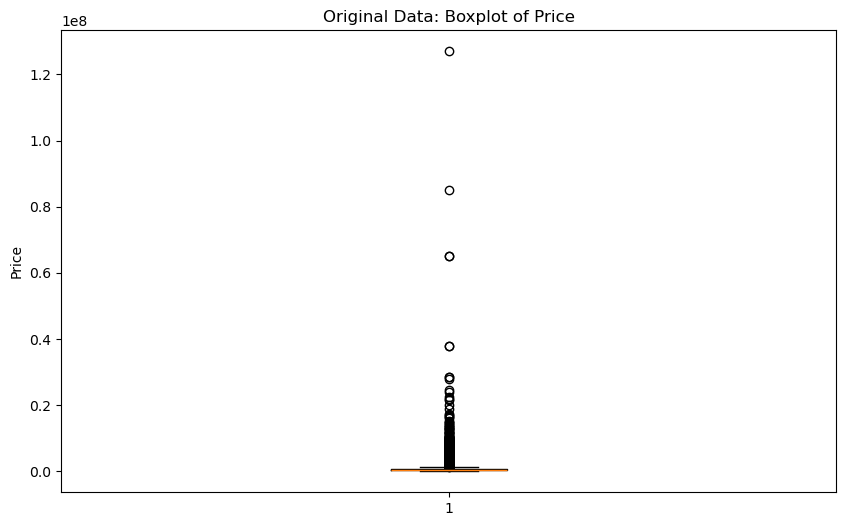

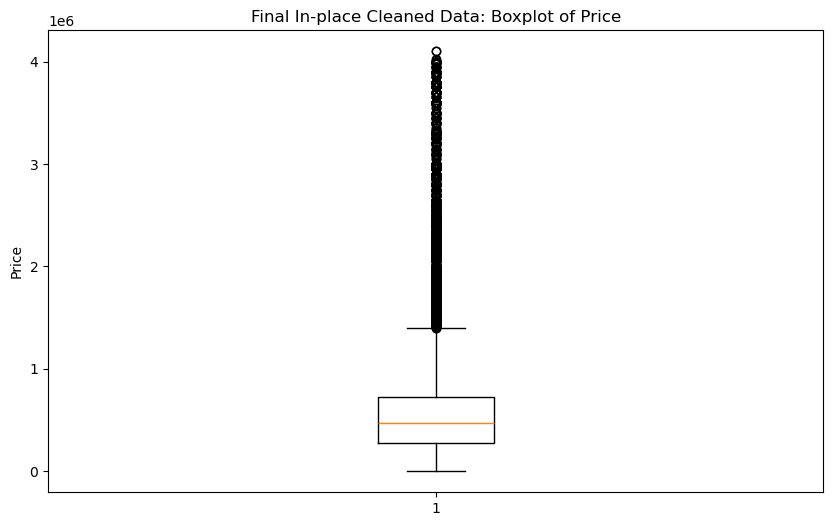

Final size of df: 49294


In [788]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# 1. Dynamically choose only columns that actually exist
desired = [
    'latitude', 'longitude', 'price', 'bedroom_number',
    'bathroom_number', 'price_per_unit', 'living_space', 'land_space'
]
num_cols = [c for c in desired if c in df.columns]
print("Numeric columns used:", num_cols)

# 2. Original boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(df['price'].dropna(), vert=True)
plt.title('Original Data: Boxplot of Price')
plt.ylabel('Price')
plt.show()

# 3. Z-score outlier removal
z_df = df[num_cols].fillna(df[num_cols].mean())
z_scores = np.abs(stats.zscore(z_df))
mask_z = (z_scores <= 3).all(axis=1)
df_z = df[mask_z]  # filtered DataFrame

# 4. IQR outlier removal
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
mask_iqr = df[num_cols].ge(lower).all(axis=1) & df[num_cols].le(upper).all(axis=1)
df_iqr = df[mask_iqr]

# 5. Choose one to apply in-place
# Uncomment the one you want to keep
df = df_z     # Apply Z-score cleaning in-place
# df = df_iqr  # Apply IQR cleaning in-place

# 6. Visualize final cleaned data
plt.figure(figsize=(10, 6))
plt.boxplot(df['price'].dropna(), vert=True)
plt.title("Final In-place Cleaned Data: Boxplot of Price")
plt.ylabel('Price')
plt.show()

# 7. Summary
print(f"Final size of df: {len(df)}")

In [789]:
print("Number of records:", df.shape[0])

Number of records: 49294


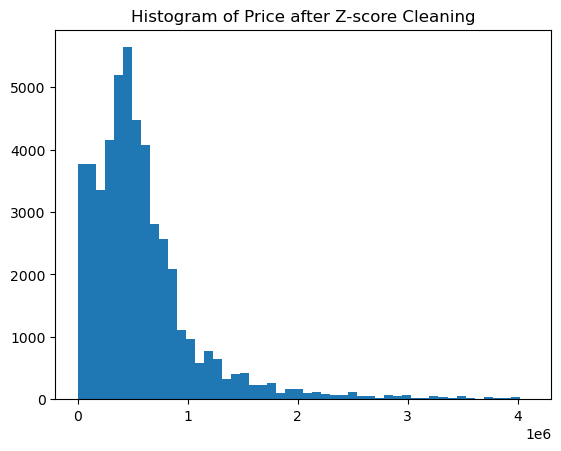

In [790]:
plt.hist(clean_df_z['price'].dropna(), bins=50)
plt.title("Histogram of Price after Z-score Cleaning")
plt.show()

In [791]:
print("Categories in 'city' variable:     ",end=" " )
print(df['city'].unique())

print("Categories in 'state' variable:  ",end=" ")
print(df['state'].unique())

print("Categories in'land_space_unit' variable:",end=" " )
print(df['land_space_unit'].unique())

print("Categories in 'property_type' variable:     ",end=" " )
print(df['property_type'].unique())

print("Categories in 'property_status' variable:     ",end=" " )
print(df['property_status'].unique())

Categories in 'city' variable:      ['Wrangell' 'Meyers Chuck' 'Coffman Cove' 'Petersburg' 'Juneau' 'Craig'
 'Tenakee Springs' 'Klawock' 'Ketchikan' 'Thorne Bay' 'Douglas' 'Gustavus'
 'Manley Hot Springs' 'Kake' 'Angoon' 'Skagway' 'Fairbanks' 'Haines'
 'Wainwright' 'Ruby' 'Koyukuk' 'Nenana' 'Chalkyitsik' 'Tok' 'Chicken'
 'Pelican' 'Anderson' 'Barrow' 'Delta Junction' 'fairbanks' 'Clear'
 'Sitka' 'North Pole' 'Lake Minchumina' 'Healy' 'Atqasuk' 'Eagle'
 'Trapper Creek' 'Talkeetna' 'Cantwell' 'South Naknek' 'Seldovia'
 'Wasilla' 'Pilot Pt' 'Yakutat' 'Tyonek' 'Remote' 'Tatitlek' 'Gakona'
 'Houston' 'Palmer' 'Soldotna' 'Eagle River' 'Tanacross' 'Valdez' 'Loop'
 'Sterling' 'Seward' 'Moose Pass' 'Larsen Bay' 'Ninilchik' 'Big Lake'
 'Nome' 'Mc Grath' 'Chugiak' 'Kodiak' 'Kasilof' 'Kenai' 'Anchorage' 'Ave'
 'Salcha' 'Jeffersontown' 'Karluk' 'Homer' 'Indian' 'Willow'
 'Nikiski/North Kenai' 'Fritz Creek' 'Sutton' 'Chickaloon' 'Girdwood'
 'Dillingham' 'Anatone' 'Royal City' 'Prescott' 'Clam Gulch'

In [792]:
df.head(2)

,property_id,city,state,postcode,price,bedroom_number,bathroom_number,price_per_unit,living_space,land_space,land_space_unit,property_type,property_status
0,2064212272,Wrangell,AK,99929,135000,3.0,2.0,297.0,1744.0,3.886,acres,LOT,FOR_SALE
1,249518113,Wrangell,AK,99929,589500,3.0,3.0,237.0,2478.0,7492.000,sqft,SINGLE_FAMILY,FOR_SALE


In [793]:
# Calculate skewness for all numerical columns
numerical_skewness = df.select_dtypes(include=['int64', 'float64']).skew()

print("Skewness for numerical features:")
print(numerical_skewness.sort_values(ascending=False))

Skewness for numerical features:
price_per_unit     6.180852
price              2.525978
living_space       2.191646
bathroom_number    1.135551
land_space         0.829704
bedroom_number     0.678279
property_id        0.477554
dtype: float64


In [794]:
# Instead of returning NaN for non-positive values
df[feature] = df[feature].apply(lambda x: np.log(x + 1) if pd.notnull(x) else np.nan)

In [795]:
# Original numerical features
numerical_features = [
    'latitude', 'longitude', 'postcode', 'price', 'bedroom_number', 
    'bathroom_number', 'living_space', 'land_space', 'price_per_unit', "property_id"
]

# Exclude these from log transformation
exclude_log_transform = ['latitude', 'longitude', 'postcode', "property_id"]

# Apply log1p transformation to avoid log(0) issues
for feature in numerical_features:
    if feature not in exclude_log_transform:
        df[feature] = df[feature].apply(lambda x: np.log1p(x) if x > 0 else np.nan)

# Check skewness
numerical_skewness = df.select_dtypes(include=['int64', 'float64']).skew()
print("Skewness for numerical features:")
print(numerical_skewness.sort_values(ascending=False))


Skewness for numerical features:
property_id        0.477554
bathroom_number    0.108152
price_per_unit    -0.153278
land_space        -0.308146
living_space      -0.352388
bedroom_number    -0.424340
price             -1.257926
dtype: float64


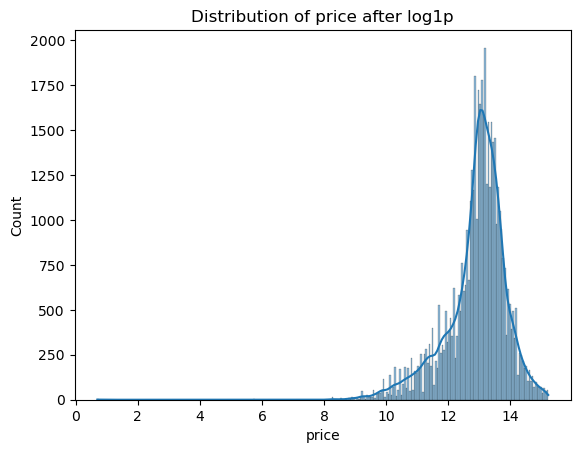

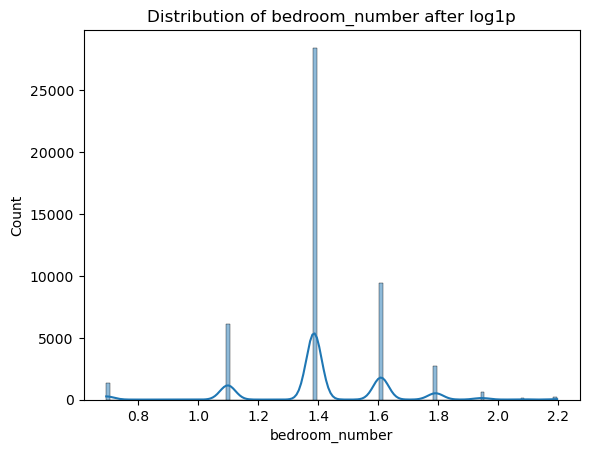

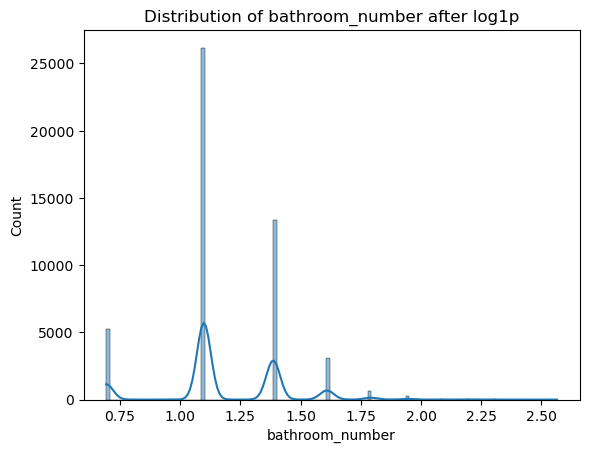

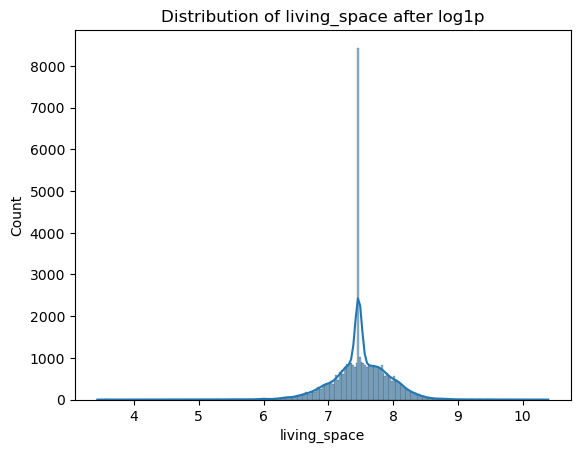

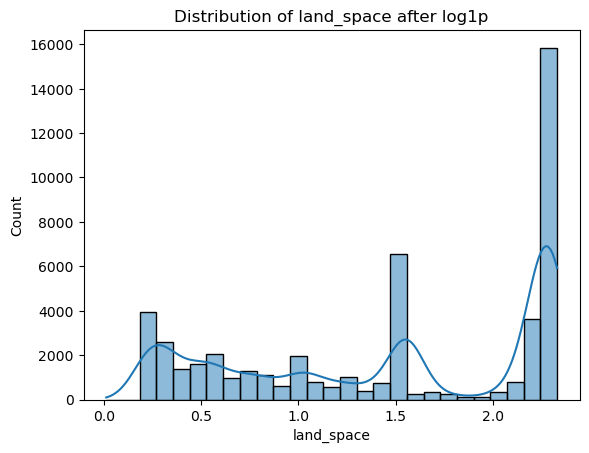

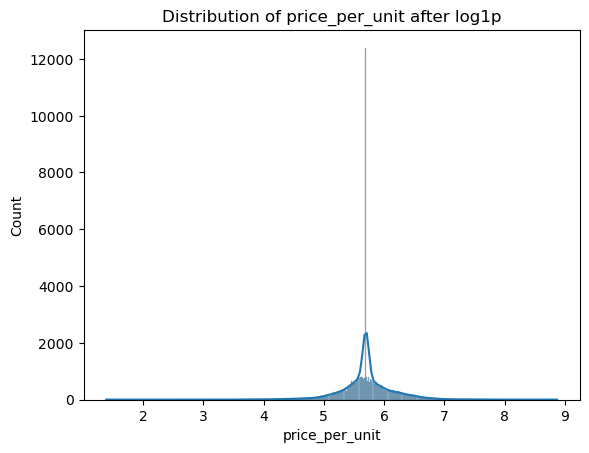

In [796]:
import seaborn as sns
import matplotlib.pyplot as plt

for feature in numerical_features:
    if feature not in exclude_log_transform:
        sns.histplot(df[feature], kde=True)
        plt.title(f'Distribution of {feature} after log1p')
        plt.show()

In [797]:
df.isna().sum()

property_id           0
city                  0
state                 0
postcode              0
price                30
bedroom_number      307
bathroom_number     405
price_per_unit       15
living_space       4157
land_space            0
land_space_unit       0
property_type         0
property_status       0
dtype: int64

In [798]:
df['price'].fillna(df['price'].median(), inplace=True)
df['price_per_unit'].fillna(df['price_per_unit'].median(), inplace=True)
df['living_space'].fillna(df['living_space'].median(), inplace=True)
df['bedroom_number'].fillna(df['bedroom_number'].median(), inplace=True)
df['bathroom_number'].fillna(df['bathroom_number'].median(), inplace=True)

Model Performance Comparison:
                               MSE      RMSE            R2
Random Forest Regressor   0.137040  0.370190  8.592346e-01
CatBoost Regressor        0.138986  0.372808  8.572365e-01
Support Vector Regressor  0.142830  0.377928  8.532880e-01
XGBRegressor              0.147146  0.383596  8.488542e-01
K-Neighbors Regressor     0.174484  0.417713  8.207728e-01
Decision Tree             0.212086  0.460528  7.821488e-01
Ridge                     0.212998  0.461517  7.812126e-01
Linear Regression         0.213178  0.461712  7.810273e-01
Lasso                     0.973538  0.986680 -4.314408e-07
AdaBoost Regressor        1.684643  1.297938 -7.304351e-01


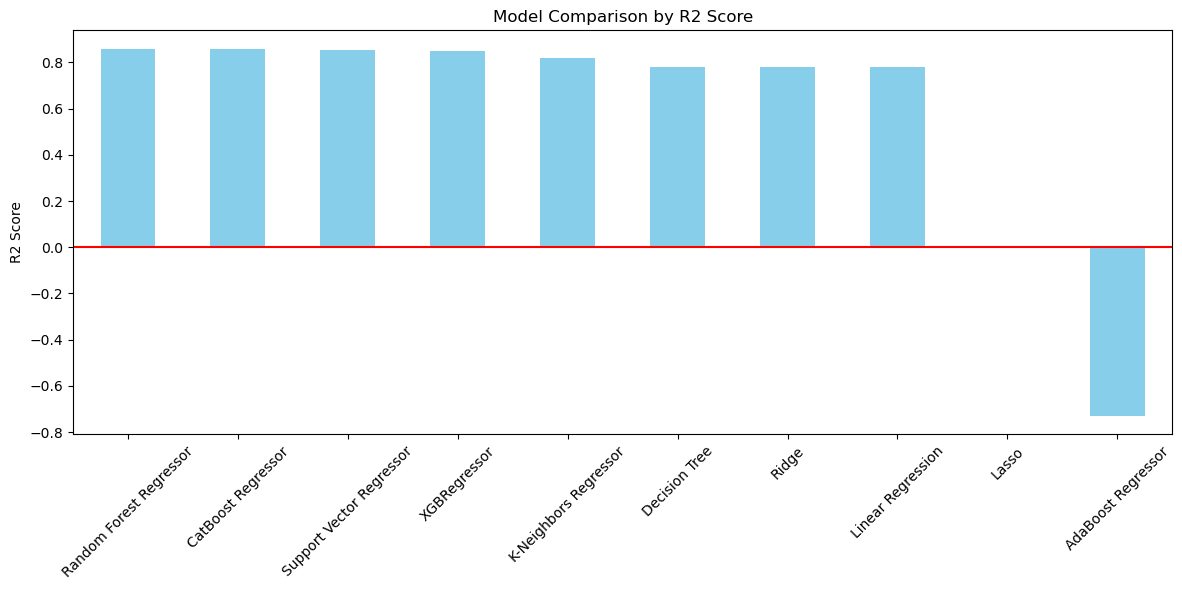


Best Model: Random Forest Regressor
R2 Score: 0.8592
RMSE: 0.37


ValueError: All arrays must be of the same length

In [799]:
# ... (previous preprocessing code remains the same until the outlier removal) ...

# After outlier removal, proceed to modeling

# 1. Define features and target
X = df.drop(['price', 'property_id'], axis=1)  # Features (excluding target and identifier)
y = df['price']  # Target variable

# 2. Identify categorical and numerical features
cat_features = X.select_dtypes(include='object').columns
num_features = X.select_dtypes(exclude='object').columns

# 3. Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ])

# 4. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5. Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "AdaBoost Regressor": AdaBoostRegressor(random_state=42),
    "Support Vector Regressor": SVR(),
    "CatBoost Regressor": CatBoostRegressor(verbose=0),
    "XGBRegressor": XGBRegressor()
}

# 6. Train and evaluate models
results = {}
for name, model in models.items():
    # Create pipeline with preprocessing and model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    
    # Train model
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred = pipeline.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results[name] = {
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2
    }

# 7. Convert results to DataFrame and sort by R2 score
results_df = pd.DataFrame(results).T
results_df.sort_values(by='R2', ascending=False, inplace=True)

# 8. Display model performance
print("Model Performance Comparison:")
print(results_df)

# 9. Visualize model performance (R2 scores)
plt.figure(figsize=(12, 6))
results_df['R2'].plot(kind='bar', color='skyblue')
plt.title('Model Comparison by R2 Score')
plt.ylabel('R2 Score')
plt.axhline(y=0, color='r', linestyle='-')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 10. Select best model based on R2 score
best_model_name = results_df.index[0]
print(f"\nBest Model: {best_model_name}")
print(f"R2 Score: {results_df.iloc[0]['R2']:.4f}")
print(f"RMSE: {results_df.iloc[0]['RMSE']:.2f}")

# 11. Feature importance for tree-based models (if available)
if hasattr(models[best_model_name], 'feature_importances_'):
    # Get feature names after one-hot encoding
    preprocessor.fit(X)
    feature_names = (list(num_features) + 
                    list(preprocessor.named_transformers_['cat']
                         .get_feature_names_out(cat_features)))
    
    # Get feature importances
    importances = models[best_model_name].feature_importances_
    
    # Create importance DataFrame
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values('Importance', ascending=False)
    
    # Plot top 20 features
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', 
                data=importance_df.head(20))
    plt.title(f'Top 20 Features - {best_model_name}')
    plt.tight_layout()
    plt.show() 

In [ ]:
# # 1. Define features and target
# X = df.drop(['price', 'property_id'], axis=1)
# y = df['price']

# # 2. Identify categorical and numerical features
# cat_features = X.select_dtypes(include='object').columns
# num_features = X.select_dtypes(exclude='object').columns

# # 3. Create preprocessing pipeline
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', StandardScaler(), num_features),
#         ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
#     ])

# # 4. Split data
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42
# )

# # 5. Initialize models
# models = {
#     "Linear Regression": LinearRegression(),
#     "Ridge": Ridge(),
#     "Lasso": Lasso(),
#     "K-Neighbors Regressor": KNeighborsRegressor(),
#     "Decision Tree": DecisionTreeRegressor(random_state=42),
#     "Random Forest Regressor": RandomForestRegressor(random_state=42),
#     "AdaBoost Regressor": AdaBoostRegressor(random_state=42),
#     "Support Vector Regressor": SVR(),
#     "CatBoost Regressor": CatBoostRegressor(verbose=0),
#     "XGBRegressor": XGBRegressor()
# }

# # 6. Train, evaluate, and store best pipeline
# results = {}
# best_pipeline = None
# best_r2 = -np.inf

# for name, model in models.items():
#     pipeline = Pipeline(steps=[
#         ('preprocessor', preprocessor),
#         ('regressor', model)
#     ])
#     pipeline.fit(X_train, y_train)
#     y_pred_log = pipeline.predict(X_test)
#     y_pred = np.expm1(y_pred_log)
#     mse = mean_squared_error(y_test, y_pred)
#     rmse = np.sqrt(mse)
#     r2 = r2_score(y_test, y_pred)
#     results[name] = {'MSE': mse, 'RMSE': rmse, 'R2': r2}
#     if r2 > best_r2:
#         best_r2 = r2
#         best_pipeline = pipeline
#         best_model_name = name

# # 7. Summarize results
# results_df = pd.DataFrame(results).T.sort_values(by='R2', ascending=False)
# print("Model Performance Comparison:")
# print(results_df)

# # 8. Plot R2 scores
# plt.figure(figsize=(12, 6))
# results_df['R2'].plot(kind='bar')
# plt.title('Model Comparison by R2 Score')
# plt.ylabel('R2 Score')
# plt.axhline(y=0, color='r')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

# print(f"\nBest Model: {best_model_name}")
# print(f"R2 Score: {best_r2:.4f}")
# print(f"RMSE: {results[name]['RMSE']:.2f}")

# # 9. Feature importances (if tree-based)
# reg = best_pipeline.named_steps['regressor']
# if hasattr(reg, 'feature_importances_'):
#     # get feature names after OneHot
#     feature_names_num = list(num_features)
#     feature_names_cat = list(
#         best_pipeline.named_steps['preprocessor']
#             .named_transformers_['cat']
#             .get_feature_names_out(cat_features)
#     )
#     feature_names = feature_names_num + feature_names_cat
#     importances = reg.feature_importances_
#     importance_df = pd.DataFrame({
#         'Feature': feature_names,
#         'Importance': importances
#     }).sort_values('Importance', ascending=False)
#     plt.figure(figsize=(12, 8))
#     sns.barplot(x='Importance', y='Feature', data=importance_df.head(20))
#     plt.title(f'Top 20 Features - {best_model_name}')
#     plt.tight_layout()
#     plt.show()


Best Model: Random Forest Regressor
R2 Score: 0.8592
RMSE: 0.37


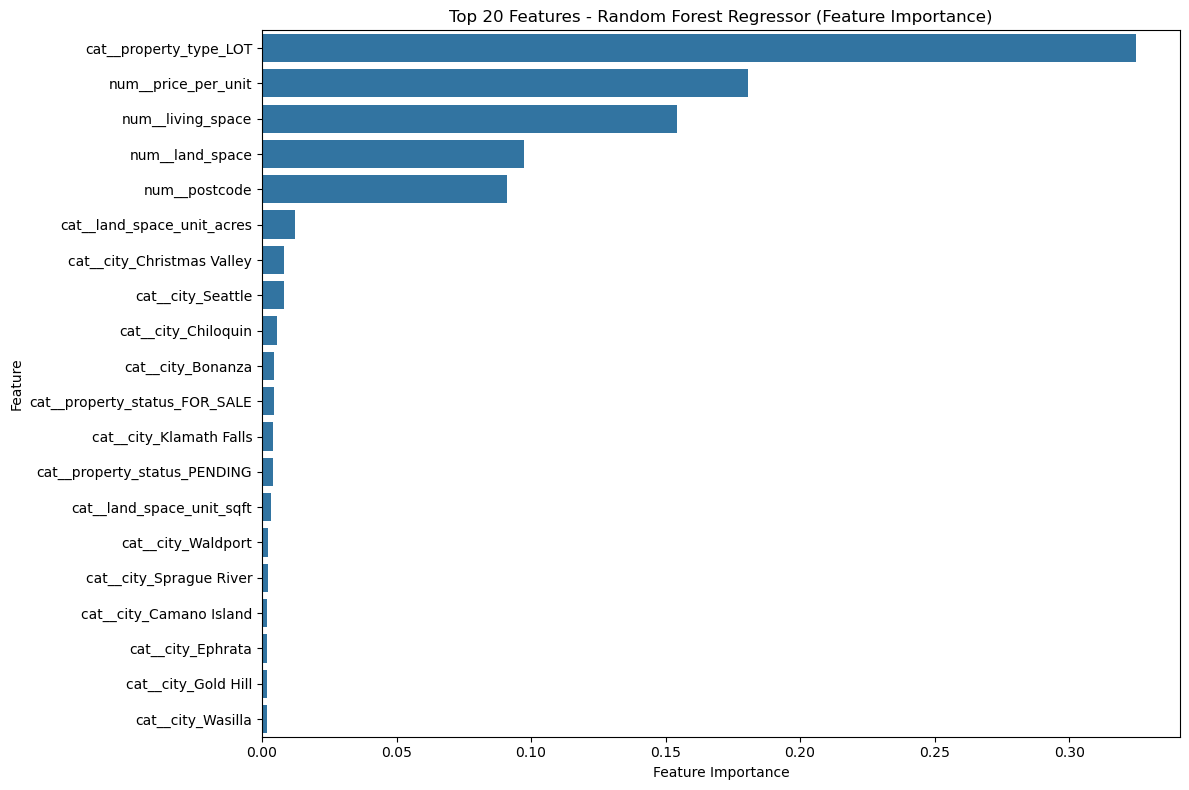

In [800]:
import pickle

# Initialize storage for pipelines
pipelines = {}

# Train and evaluate models
results = {}
for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    pipeline.fit(X_train, y_train)
    pipelines[name] = pipeline  # Store pipeline
    
    # Evaluation code remains the same
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'RMSE': rmse, 'R2': r2}

# ... (results display code remains the same) ...

# Select best model based on R2 score
best_model_name = results_df.index[0]
best_pipeline = pipelines[best_model_name]  # Retrieve stored pipeline

print(f"\nBest Model: {best_model_name}")
print(f"R2 Score: {results_df.iloc[0]['R2']:.4f}")
print(f"RMSE: {results_df.iloc[0]['RMSE']:.2f}")

# Feature Importance
fitted_model = best_pipeline.named_steps['regressor']
preprocessor_in_pipeline = best_pipeline.named_steps['preprocessor']
feature_names = preprocessor_in_pipeline.get_feature_names_out()

# Handle different model types
if hasattr(fitted_model, 'feature_importances_'):
    importances = fitted_model.feature_importances_
    importance_type = 'Feature Importance'
elif hasattr(fitted_model, 'coef_'):
    importances = np.abs(fitted_model.coef_)  # Use absolute coefficients
    importance_type = 'Absolute Coefficient'
else:
    print(f"\n{best_model_name} does not support feature importance or coefficients.")
    importances = None

if importances is not None:
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        importance_type: importances
    }).sort_values(importance_type, ascending=False)
    
    plt.figure(figsize=(12, 8))
    sns.barplot(x=importance_type, y='Feature', data=importance_df.head(20))
    plt.title(f'Top 20 Features - {best_model_name} ({importance_type})')
    plt.tight_layout()
    plt.show()

# Save the best pipeline
with open('model.pkl', 'wb') as f:
    pickle.dump(best_pipeline, f)

In [805]:
import joblib
import pandas as pd

# Load the model
model = joblib.load('C:/Users/shman/Downloads/ADSA_Python_Project/Webpage/model.pkl')

# Prepare new data (must match original feature structure)
new_property = pd.DataFrame({
    'city': ['Seattle'],
    'state': ['WA'],
    'bedroom_number': [3],
    'bathroom_number': [2],
    'price_per_unit': [300],
    'living_space': [1800],
    "postcode": [99918],
    'land_space': [5000],
    'land_space_unit': ['sqft'],
    'property_type': ['SINGLE_FAMILY'],
    'property_status': ['FOR_SALE']
})

# Make prediction
predicted_price = model.predict(new_property)
print(f"Predicted value: ${predicted_price[0]:,.2f}")

Predicted value: $15.19
